# Section 31 Part 3 KMeans Cluster Analysis(Iris and World Happiness)

##### Lecture 197 The Main Idea 1
##### Lecture 198 The Main Idea 2
##### Lecture 199 Fit The Model
##### Lecture 200 Plot Clusters
##### Lecture 201 World Happiness

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [78]:
iris = sns.load_dataset('iris')

##### Step 1: Scale the Data

In [79]:
# Scale data as standard variance/deviation is not the same across all data columns

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.iloc[:, 0:4])

In [80]:
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [81]:
pd.DataFrame(iris_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [82]:
# Set up numpy array as dataframe:
iris_scaled = pd.DataFrame(iris_scaled, columns=iris.columns[0:4])
iris_scaled.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444


##### Step 2:  K-Menas Clustering
##### \* Fit()
##### \* Check Lables

In [83]:
# Init defaults to 10 controls the number of centroids to run with
# Tutor knocked init down to 8 but can't get even close to a good result below 10.

k_model = KMeans(n_clusters=3, n_init=10)

In [84]:
k_model.fit(iris_scaled)

KMeans(n_clusters=3, n_init=10)

In [85]:
k_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [86]:
# Build dataframe to compare the results of the classification:

classification_result = pd.DataFrame(
    {
        'Species':iris.species,
        'K_means Class': k_model.labels_
    }
)

classification_result

,Species,K_means Class
0,setosa,2
1,setosa,2
2,setosa,2
3,setosa,2
4,setosa,2
...,...,...
145,virginica,0
146,virginica,1
147,virginica,0
148,virginica,0


In [87]:
# To look at results do a crosstabulations of the data:

pd.crosstab(iris.species, k_model.labels_)

col_0,0,1,2
species,,,
setosa,0,0,50
versicolor,11,39,0
virginica,36,14,0


#### Step 3 Plot the Clusters:



In [88]:
iris_scaled['Group'] = k_model.labels_
iris_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,Group
0,-0.900681,1.019004,-1.340227,-1.315444,2
1,-1.143017,-0.131979,-1.340227,-1.315444,2
2,-1.385353,0.328414,-1.397064,-1.315444,2
3,-1.506521,0.098217,-1.283389,-1.315444,2
4,-1.021849,1.249201,-1.340227,-1.315444,2


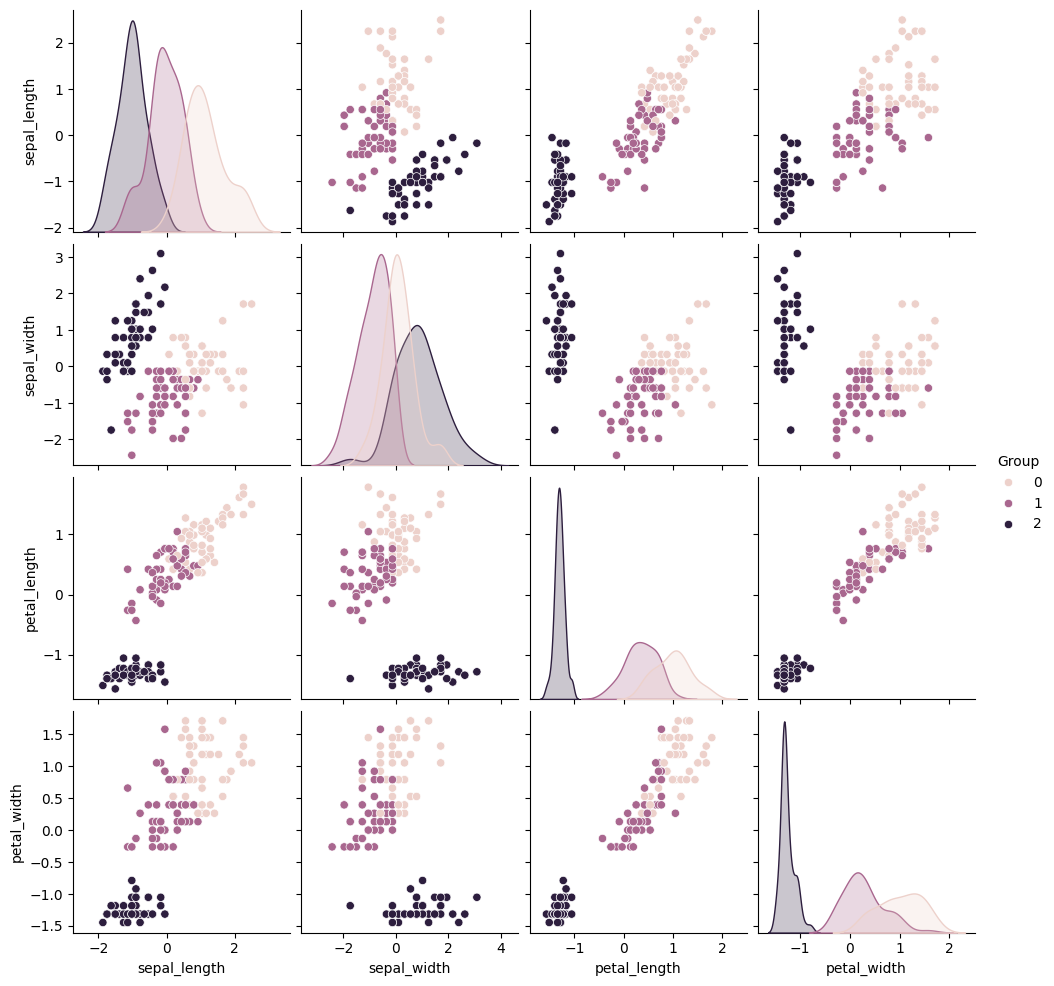

In [89]:
sns.pairplot(data=iris_scaled, hue='Group').fig.savefig(r'output/iris_pairplot.png')

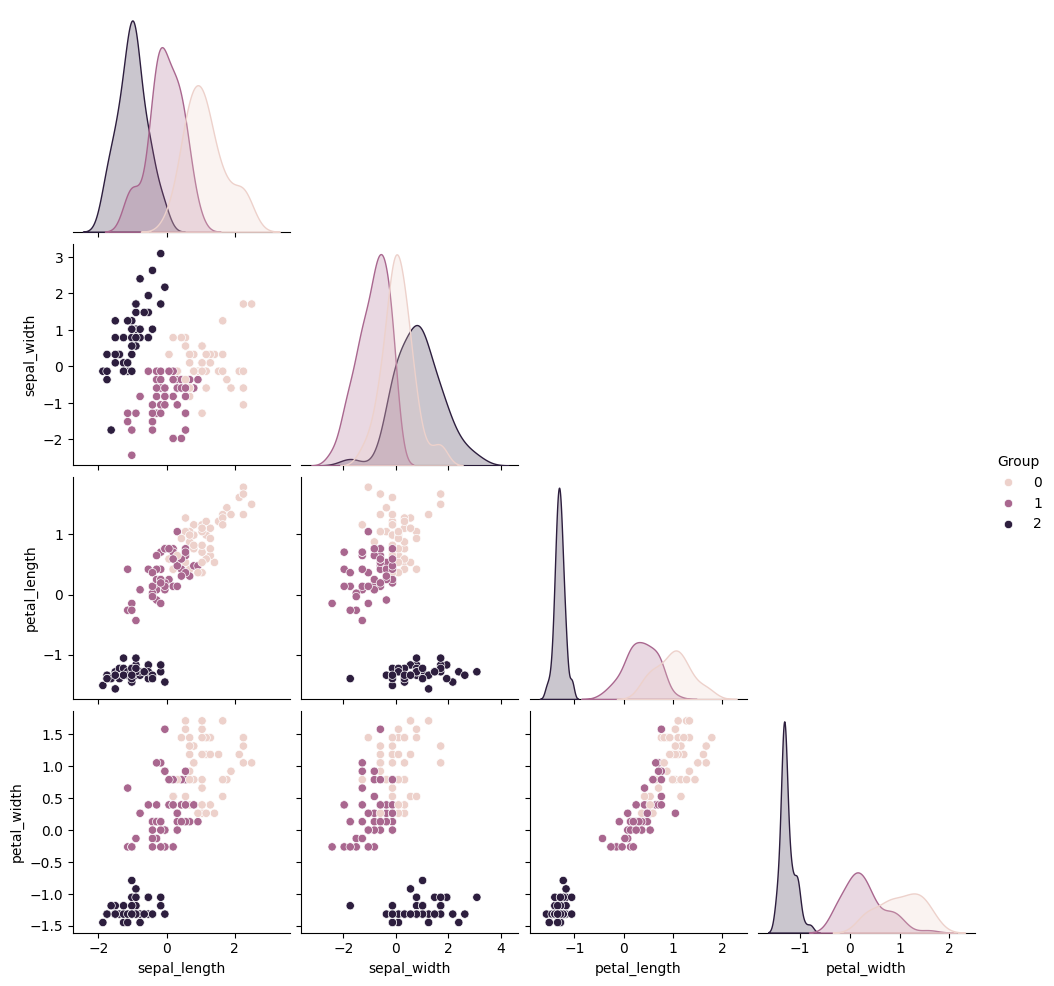

In [90]:
sns.pairplot(data=iris_scaled, hue='Group', corner=True).fig.savefig(r'output/iris_pairplot_Cnr.png')

#### Example 3: World Happiness Report

In [91]:
happiness = pd.read_csv(r'../Resources/Section_31/2019-world-happiness-report.csv')
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [92]:
# Scale data down to mean 0 and std of 1

scaler_2 = StandardScaler()
X_scaled = scaler_2.fit_transform(happiness.iloc[:, 3:])
X = pd.DataFrame(X_scaled, columns=happiness.columns[3:])
X.head()

# For full data:
Scaler_3 = StandardScaler()
X_full_scaled = Scaler_3.fit_transform(happiness.iloc[:,6:])

##### Step 2:  Reduce Dimensions to 2 by PCA:

In [93]:
pca_model = PCA()
X_Transformed = pca_model.fit_transform(X_scaled)

# Pca model for full data
pca_model_full = pca_model.fit_transform(X_full_scaled)

In [94]:
X_Transformed

array([[-3.13422596e+00,  1.05354236e+00, -1.92343596e+00,
        -2.92393852e-01,  5.84556976e-01, -1.89733299e-01],
       [-3.29205254e+00,  1.83605736e+00, -1.47174738e+00,
         2.38936384e-01,  5.50629392e-01, -8.29230330e-02],
       [-3.33824688e+00,  1.53789598e+00, -7.88606880e-01,
         2.30770064e-01,  2.67636491e-01,  9.77785892e-02],
       [-2.59277633e+00,  9.45854314e-01,  1.53858949e+00,
         1.75866768e-01, -1.05342643e-01,  6.76555084e-02],
       [-2.83510421e+00,  1.68557103e+00, -2.25374034e-01,
         5.61250334e-01,  1.84423942e-01,  7.11868488e-02],
       [-3.16873300e+00,  1.45670834e+00, -9.27162620e-01,
         3.92493122e-01,  1.46313933e-01, -1.45835951e-02],
       [-3.03009047e+00,  1.75280730e+00, -1.17888278e+00,
         3.74270455e-01,  2.36877703e-01, -2.73959374e-02],
       [-3.16284570e+00,  2.26072778e+00, -7.67288240e-01,
         5.56408765e-01,  4.16233654e-01, -2.42201036e-01],
       [-2.93137777e+00,  1.53422729e+00, -5.188

In [95]:
X_Transformed.shape

(156, 6)

In [96]:
pca_model.explained_variance_ratio_

array([0.56503859, 0.25010891, 0.1848525 ])

In [97]:
pca_model.explained_variance_ratio_.cumsum()

array([0.56503859, 0.8151475 , 1.        ])

In [98]:
# Choose only first 2 columns as the contain the most important data for the analysis:

X_reduced = X_Transformed[:,0:2]

#### Step 3:  Cluster modeling:

In [99]:
# cluster modelling with only the reduced data set:

groups_reduced = []
for k in range(2, 8):
    cluster_mod = KMeans(n_clusters=k)
    cluster_mod.fit(X_reduced)
    groups_reduced.append(cluster_mod.labels_)
    

In [100]:
# Not in lecture but try with all data-points too.

groups_full = []
for k in range(2, 8):
    cluster_full = KMeans(n_clusters=k)
    cluster_full.fit(X_Transformed)
    groups_full.append(cluster_mod.labels_)
    
    

In [101]:
groups_reduced

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0,
        2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2,
        0, 2, 2, 2, 0,

In [102]:
groups_full

[array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 1, 3, 3,
        1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 3, 5, 1, 4, 1, 4, 1, 3, 1, 1, 4,
        4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 5, 1, 4, 4, 1, 1,
        2, 1, 4, 1, 5, 4, 1, 0, 1, 3, 4, 5, 1, 4, 1, 1, 5, 5, 2, 0, 4, 5,
        5, 5, 5, 0, 1, 4, 0, 2, 1, 2, 2, 0, 5, 6, 2, 5, 0, 5, 5, 1, 0, 5,
        2, 0, 5, 6, 2, 5, 0, 2, 5, 0, 0, 2, 0, 5, 0, 5, 2, 2, 6, 4, 0, 6,
        5, 2, 2, 2, 5, 0, 6, 0, 6, 6, 2, 2, 6, 2, 6, 5, 6, 6, 2, 0, 0, 6,
        6, 6]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 1, 3, 3,
        1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 3, 5, 1, 4, 1, 4, 1, 3, 1, 1, 4,
        4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 5, 1, 4, 4, 1, 1,
        2, 1, 4, 1, 5, 4, 1, 0, 1, 3, 4, 5, 1, 4, 1, 1, 5, 5, 2, 0, 4, 5,
        5, 5, 5, 0, 1, 4, 0, 2, 1, 2, 2, 0, 5, 6, 2, 5, 0, 5, 5, 1, 0, 5,
        2, 0, 5, 6, 2, 5, 0, 2, 5, 0, 0, 2, 0, 5, 0, 5, 2, 2, 6, 4, 0, 6,
        5, 2, 2, 2, 5,

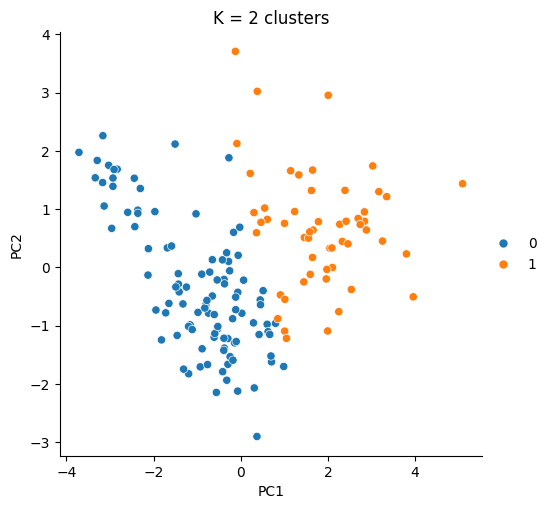

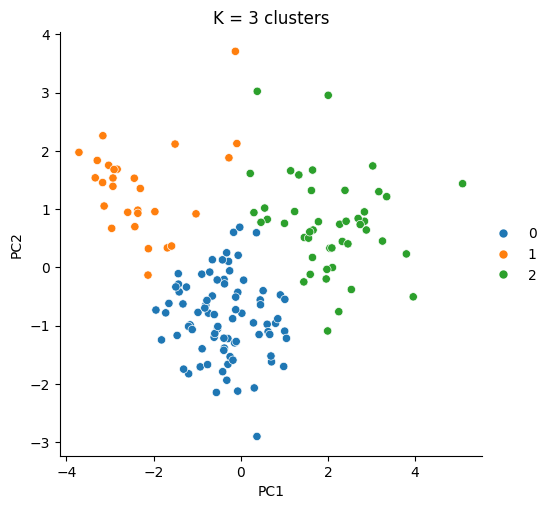

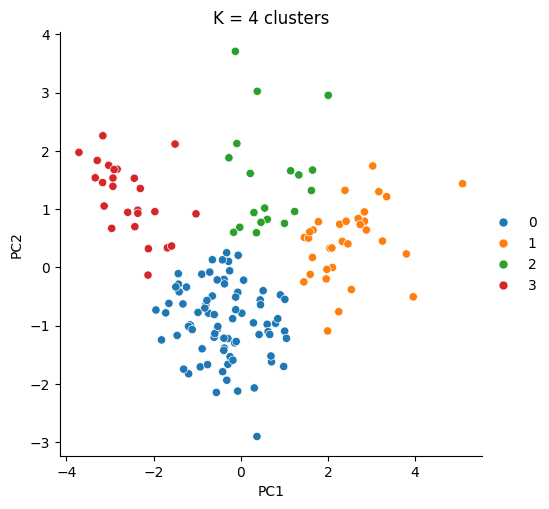

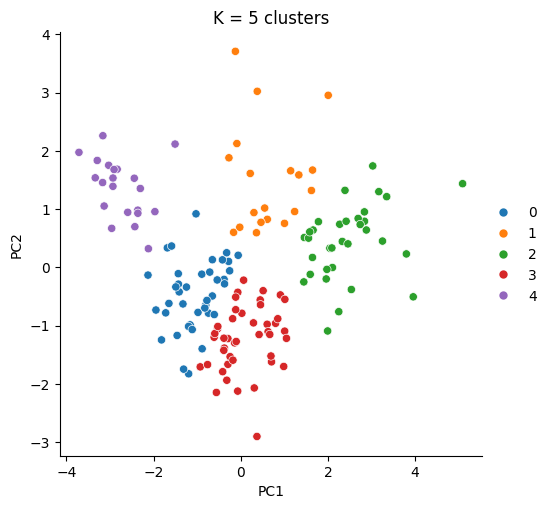

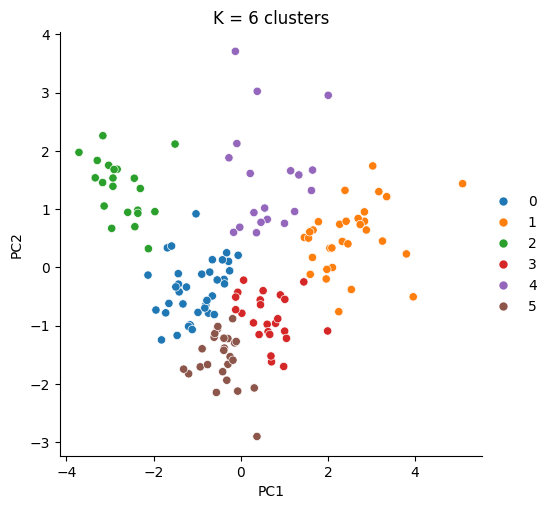

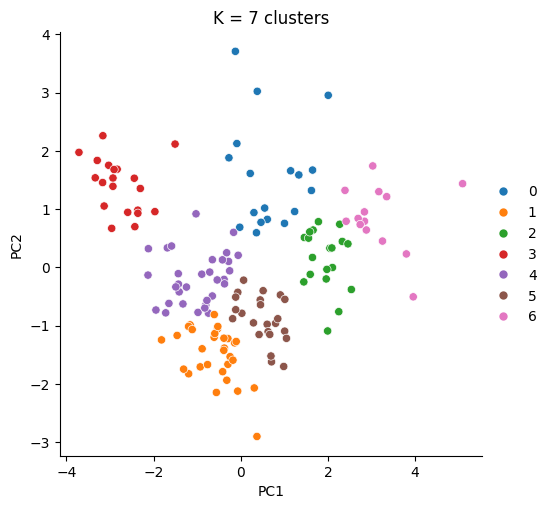

In [122]:
# Plotting
# First convert X_reduced to DF

X_r = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
# X_r.head()
for k in range(0, len(groups_reduced)):
    sns.relplot(data=X_r, x='PC1', y = 'PC2', hue=groups_reduced[k], palette='tab10').set(title=f'K = {k + 2} clusters').fig.savefig(f'output/happinessrel{k}.png')

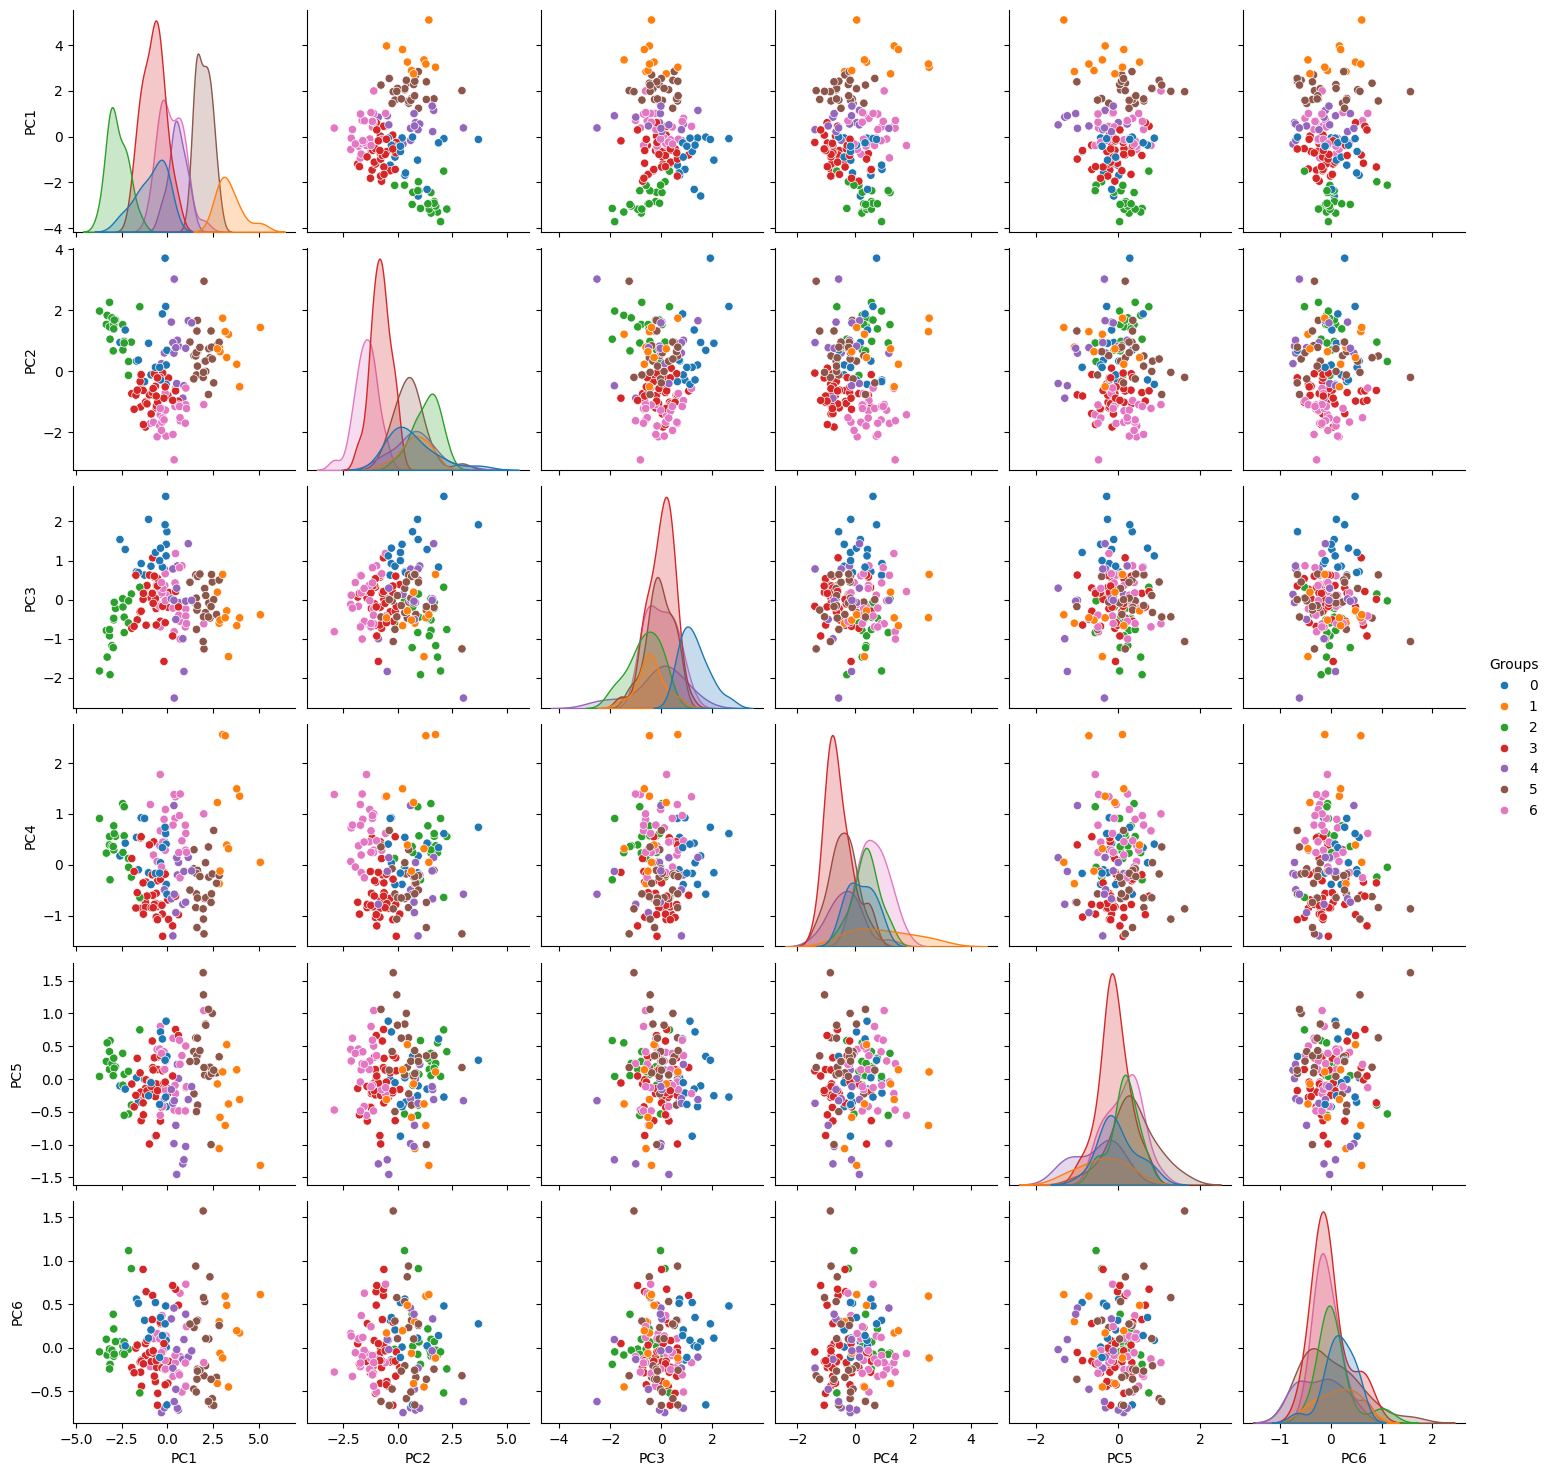

In [119]:
df_full = pd.DataFrame(X_Transformed, columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_full['Groups'] = cluster_full.labels_
df_full
sns.pairplot(data=df_full, hue='Groups', palette='tab10').fig.savefig(r'output/pairplotHappinessFull_1.png')

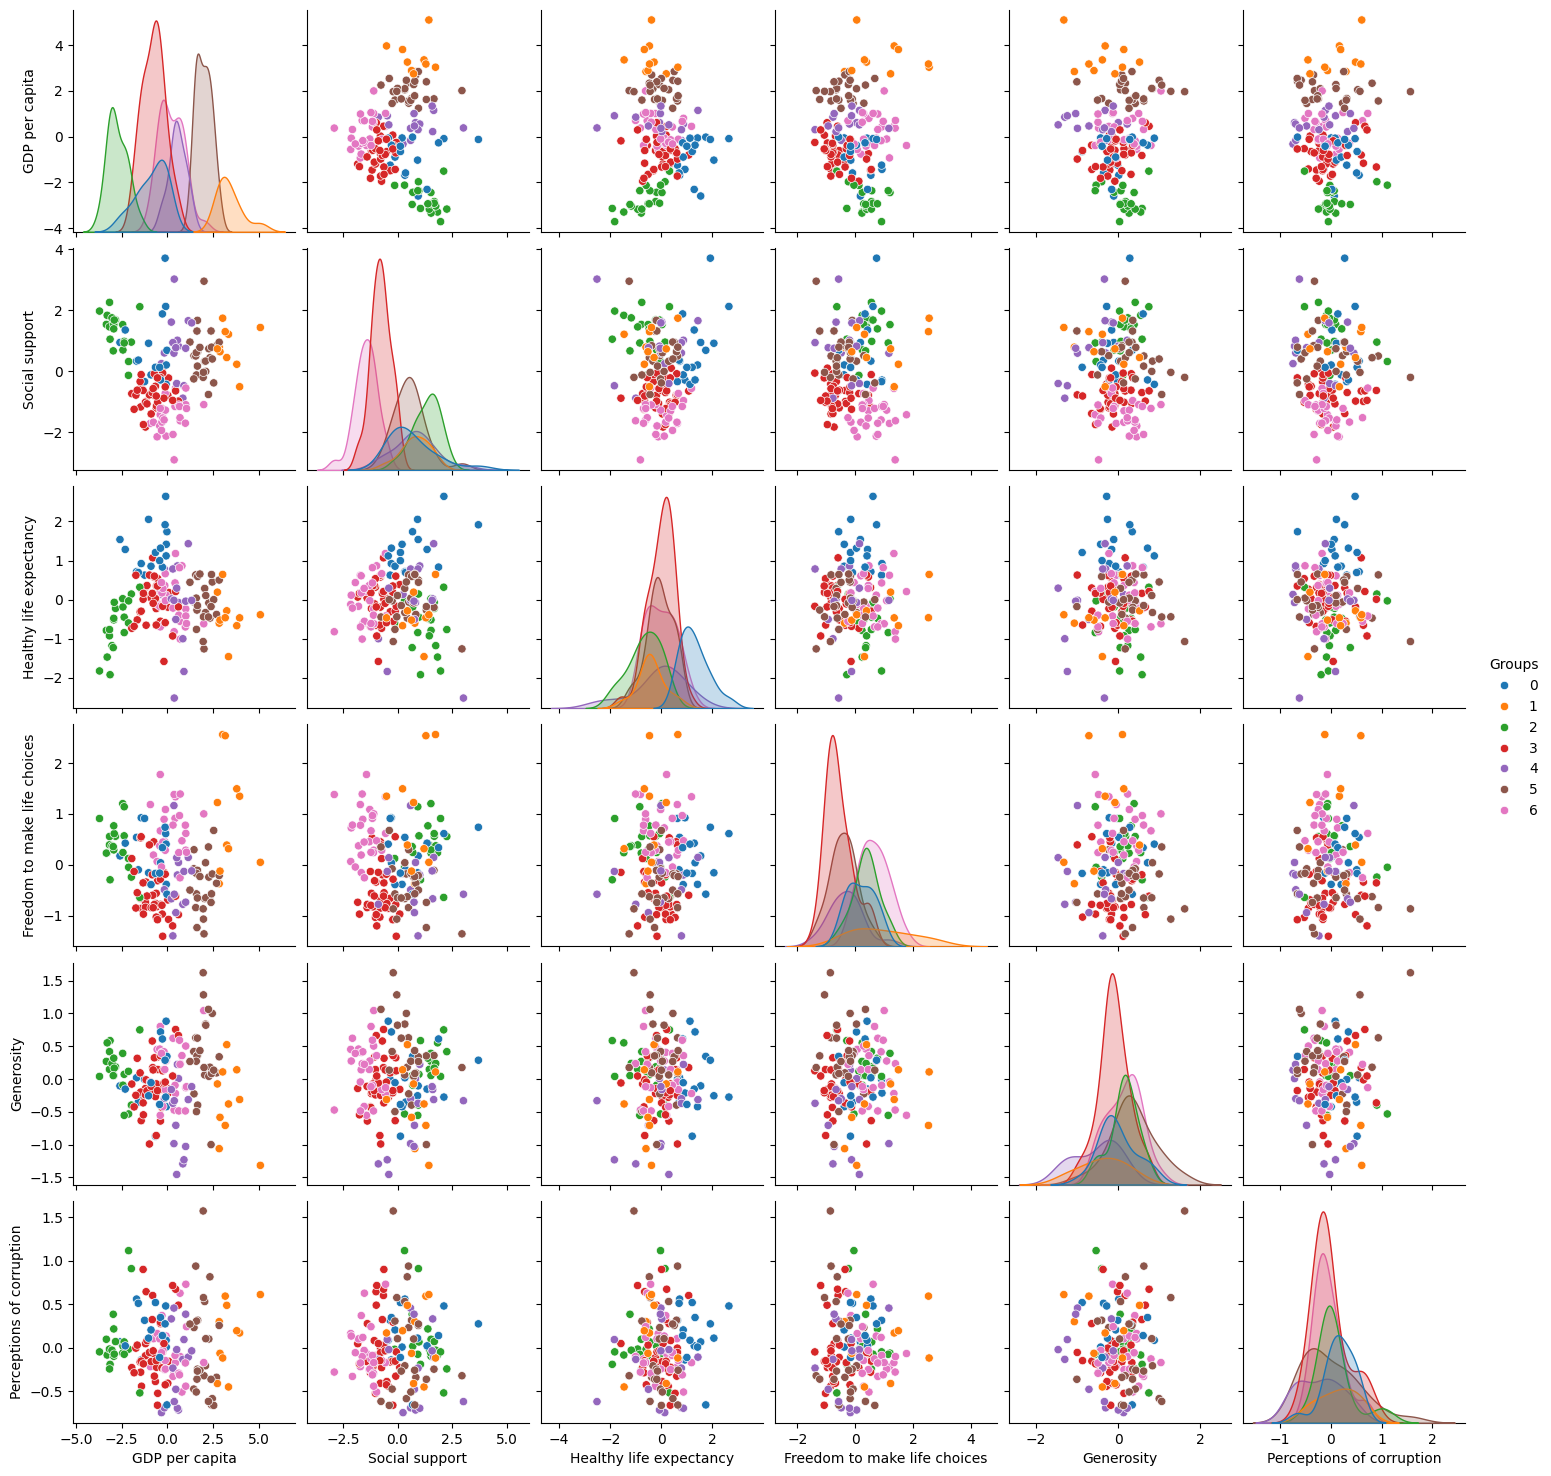

In [123]:
# Try it with more sensible headers:
df_full = pd.DataFrame(X_Transformed, columns=happiness.columns[3:])
df_full['Groups'] = cluster_full.labels_
# df_full
sns.pairplot(data=df_full, hue='Groups', palette='tab10').fig.savefig(r'output/pairplotHappinessFull_2.png')

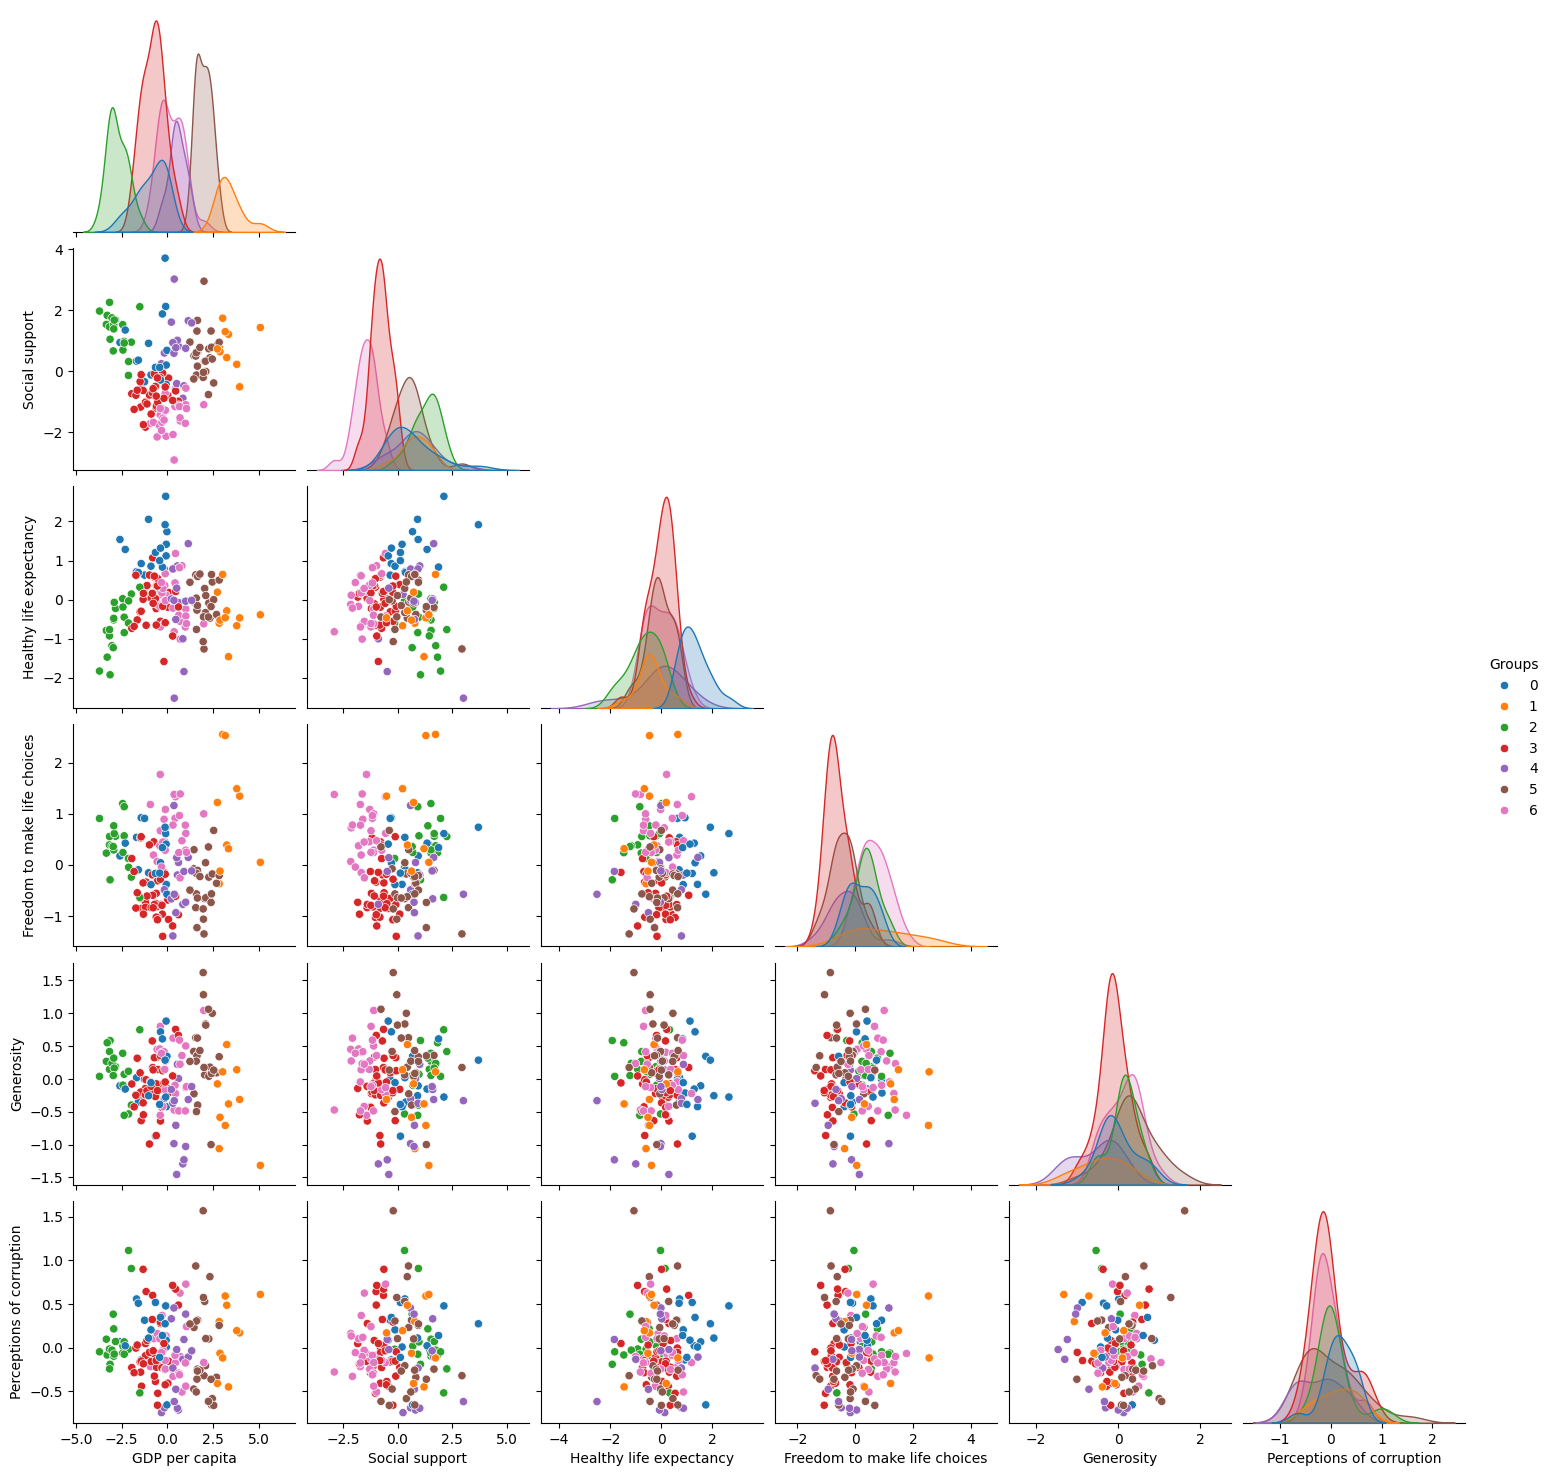

In [124]:
sns.pairplot(data=df_full, hue='Groups', palette='tab10', corner=True).fig.savefig(r'output/pairplotHappinessFull_2_Corner.png')